## **1. Dataset Overview**

This dataset contains 20 types of fruits, each described by measurable features like:

* Size (numeric)

* Color (categorical)

* Taste (categorical)

* Average Price (₹) (numeric)





🔗 Source: [link text](https://www.kaggle.com/datasets/pranavkapratwar/fruit-classification/data)

### **Goal: Build a classification model that accurately predicts the fruit name based on its characteristics**

## **2. Importing necessary Libraries and Dataset**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

import kagglehub

### Importing Dataset From Kaggle

In [4]:
# # Downloading the latest version of the dataset
# path = kagglehub.dataset_download("pranavkapratwar/fruit-classification")
# print("Path to dataset files:", path)

In [3]:

file_names = os.listdir(path)
csv_file_name = [f for f in file_names if f.endswith('.csv')][0] # Adjust if multiple CSVs or specific name needed
full_csv_path = os.path.join(path, csv_file_name)

df = pd.read_csv(full_csv_path)

df.head(15)

NameError: name 'path' is not defined

## **3. Data Analysis & Cleaning**

* **Before modeling, we explore and clean the data:**

* **Checked for missing values and duplicates**

* **Identified categorical and numerical columns**

* **Used the IQR method to detect and remove outliers**



In [2]:
df = pd.read_csv(full_csv_path)


NameError: name 'full_csv_path' is not defined

In [8]:
df1 = df.copy()
df1.head()

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,watermelon
1,24.6,round,3283.9,163.8,green,sweet,watermelon
2,7.8,round,319.0,91.3,green,sweet,custard apple
3,20.0,oval,1607.0,85.7,orange,sweet,papaya
4,10.2,long,131.5,37.8,yellow,sweet,banana


In [9]:
print(f"Shape of the Data \n{df1.shape}")

Shape of the Data 
(10000, 7)


In [17]:
print(f"Data info \n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
Index: 9754 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size (cm)      9754 non-null   float64
 1   shape          9754 non-null   object 
 2   weight (g)     9754 non-null   float64
 3   avg_price (₹)  9754 non-null   float64
 4   color          9754 non-null   object 
 5   taste          9754 non-null   object 
 6   fruit_name     9754 non-null   object 
dtypes: float64(3), object(4)
memory usage: 609.6+ KB
Data info 
None


In [ ]:
print(f"Data describe \n{df1.describe()}")

INFO : Data describe 
          size (cm)    weight (g)  avg_price (₹)
count  10000.000000  10000.000000   10000.000000
mean       8.430600    455.457720      77.016720
std        6.396915    731.643087      38.946916
min        0.900000      4.500000       9.000000
25%        3.700000     45.800000      45.575000
50%        7.200000    168.800000      75.400000
75%       10.100000    365.275000     100.700000
max       27.500000   3299.800000     165.000000


From the statistical view of these, the mean of the size, weight and avg_price appear to be greter than the median which means they are right skewed. 

the size seems to be tightly clustered a little because the standard deviation is lesser than the mean compared to the weight and avg_price that the std is far from the mean which means that they are very spread out.

**Summary Table**

|Feature   | Skewness  | Possible Outlier    | Reason  |
|---------- | ---------- | ------------------ | -------- |
|Size    | SLightly right skew | Low | Small range, modest std|



In [10]:
print(f"Data columns \n{df1.columns}")


Data columns 
Index(['size (cm)', 'shape', 'weight (g)', 'avg_price (₹)', 'color', 'taste',
       'fruit_name'],
      dtype='object')


In [11]:
print(f"Data types \n{df1.dtypes}")

Data types 
size (cm)        float64
shape             object
weight (g)       float64
avg_price (₹)    float64
color             object
taste             object
fruit_name        object
dtype: object


In [15]:
print(f"Data null values \n{df1.isnull().sum()}")

Data null values 
size (cm)        0
shape            0
weight (g)       0
avg_price (₹)    0
color            0
taste            0
fruit_name       0
dtype: int64


In [ ]:
print(f"Duplicated values \n{df1.duplicated().sum()}")

Duplicated values 
246


In [ ]:
df1.drop_duplicates(inplace= True)
print(f"Duplicate Values have been dropped")

Duplicate Values have been dropped


In [ ]:
print(f"Duplicated values \n{df1.duplicated().sum()}")

Duplicated values 
0


In [ ]:
def handle_outliers_iqr(df1, column):

    # Calculate Q1, Q3, and IQR
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print summary
    print(f"\n Column: {column}")
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

    # Detect outliers
    outliers = df1[(df[column] < lower_bound) | (df1[column] > upper_bound)]
    print(f"\n Outliers Detected ({len(outliers)} rows):\n", outliers)

    # Remove outliers
    cleaned_df = df1[(df[column] >= lower_bound) & (df1[column] <= upper_bound)]
    print(f"\n Cleaned Data Size: {len(cleaned_df)} (from {len(df1)})")

    return cleaned_df


In [ ]:
columns = df1.columns.to_list()

In [20]:
print(columns)


['size (cm)', 'shape', 'weight (g)', 'avg_price (₹)', 'color', 'taste', 'fruit_name']


In [ ]:
# Grouping into categorical and numerical columns
cat_columns = df1.select_dtypes(include='object').columns.to_list()


num_columns = df1.select_dtypes(include=['number']).columns.to_list()

In [22]:
for col in num_columns:
    df = handle_outliers_iqr(df1, col)


 Column: size (cm)
Q1: 4.00, Q3: 10.20, IQR: 6.20
Lower Bound: -5.30, Upper Bound: 19.50

 Outliers Detected (866 rows):
       size (cm)  shape  weight (g)  avg_price (₹)   color  taste  fruit_name
0          25.4  round      3089.2          137.1   green  sweet  watermelon
1          24.6  round      3283.9          163.8   green  sweet  watermelon
3          20.0   oval      1607.0           85.7  orange  sweet      papaya
43         27.2  round      2818.8          148.4   green  sweet  watermelon
50         24.8  round      3274.4          148.3   green  sweet  watermelon
...         ...    ...         ...            ...     ...    ...         ...
9938       21.0   oval      1610.0           73.3  orange  sweet      papaya
9952       26.3  round      3190.8          136.4   green  sweet  watermelon
9983       22.5  round      3202.0          156.5   green  sweet  watermelon
9988       21.5   oval      1358.7           77.7  orange  sweet      papaya
9989       19.8   oval      15

## **4. Exploratory Data Analysis (EDA)**

### **A deeper dive into the dataset helps visualize relationships and class balance.**

In [31]:
print(f"Categorical columns \n{cat_columns}")

Categorical columns 
['shape', 'color', 'taste', 'fruit_name']


In [32]:
print(f"Numerical columns \n{num_columns}")

Numerical columns 
['size (cm)', 'weight (g)', 'avg_price (₹)']


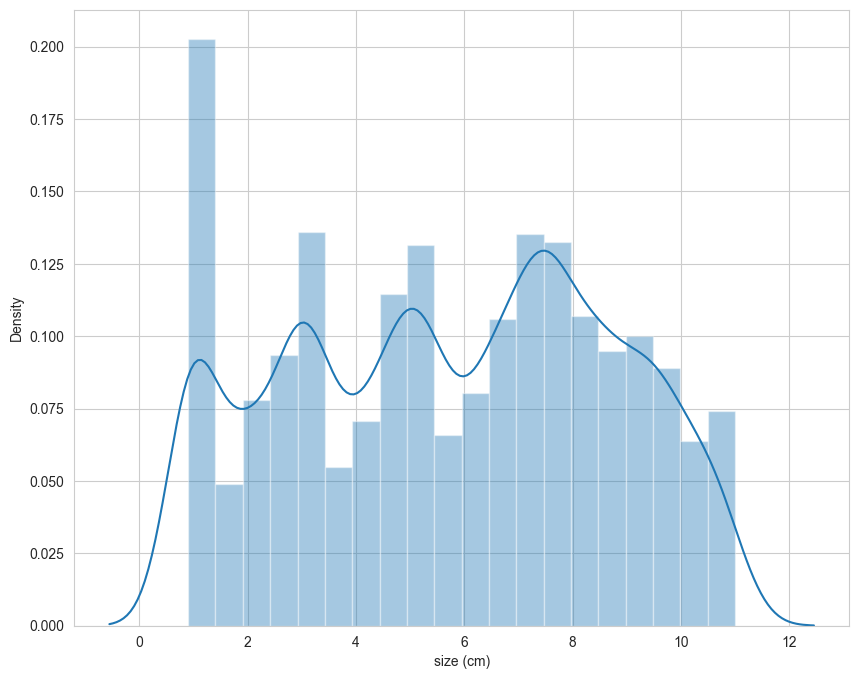

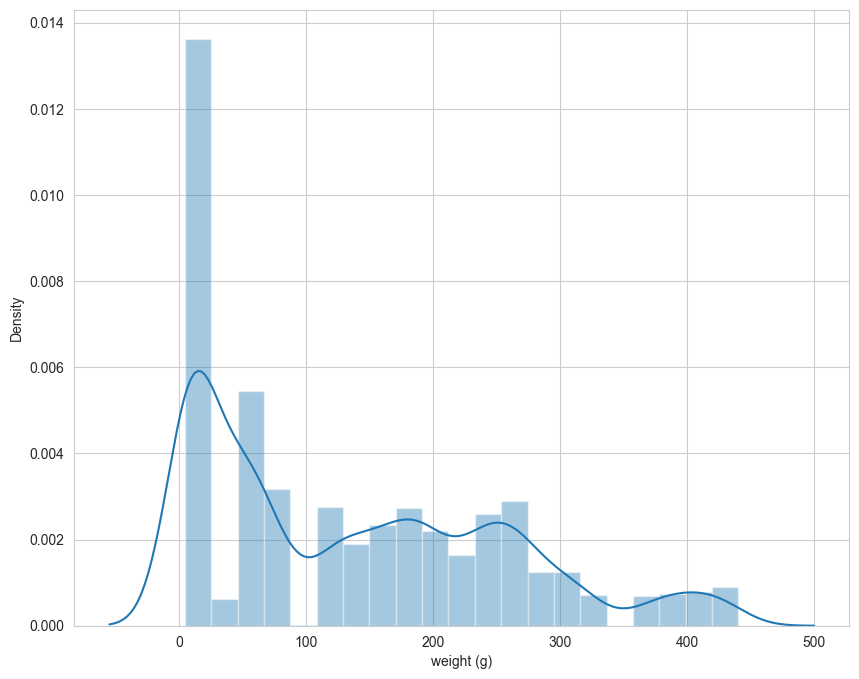

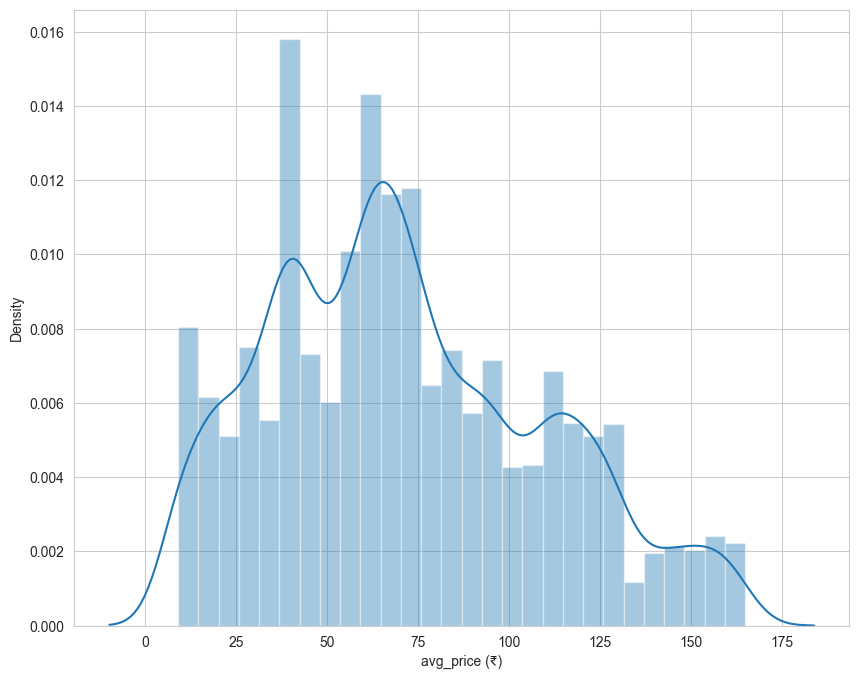

In [ ]:
for i in num_columns:
  plt.figure(figsize=(10,8))
  sns.set_style(style="whitegrid")
  sns.histplot(df[i])

In [33]:
print(f"Data shape after removing outliners \n{df.shape}")

Data shape after removing outliners 
(7712, 7)


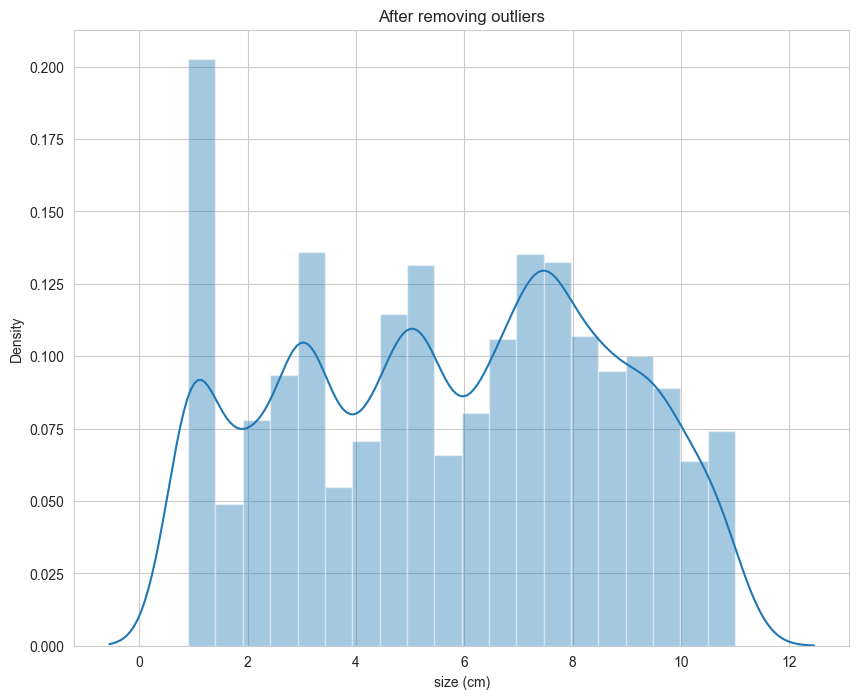

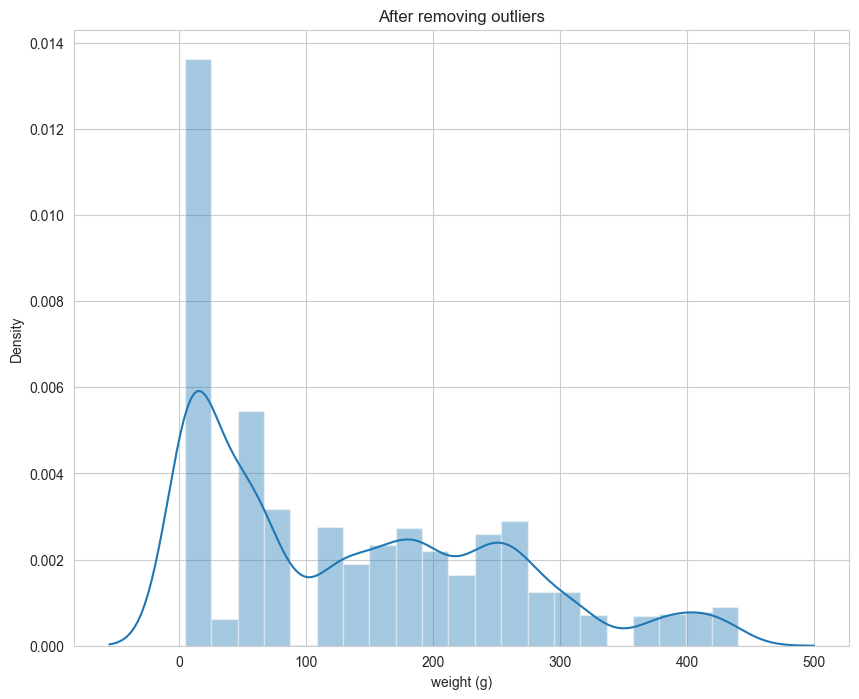

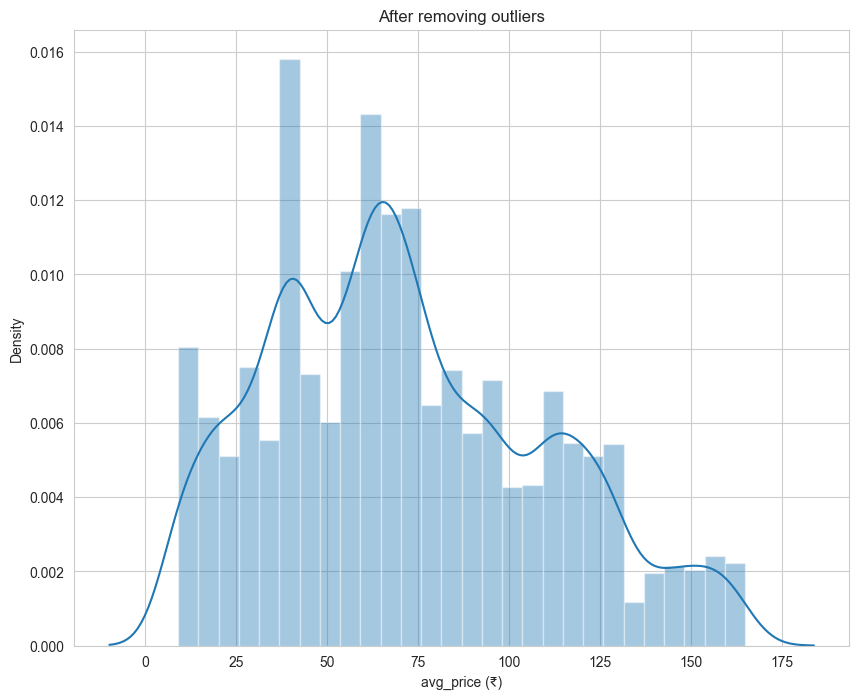

In [26]:
for i in num_columns:
  plt.figure(figsize=(10,8))
  plt.title("After removing outliers")
  sns.set_style(style="whitegrid")
  sns.distplot(df[i])

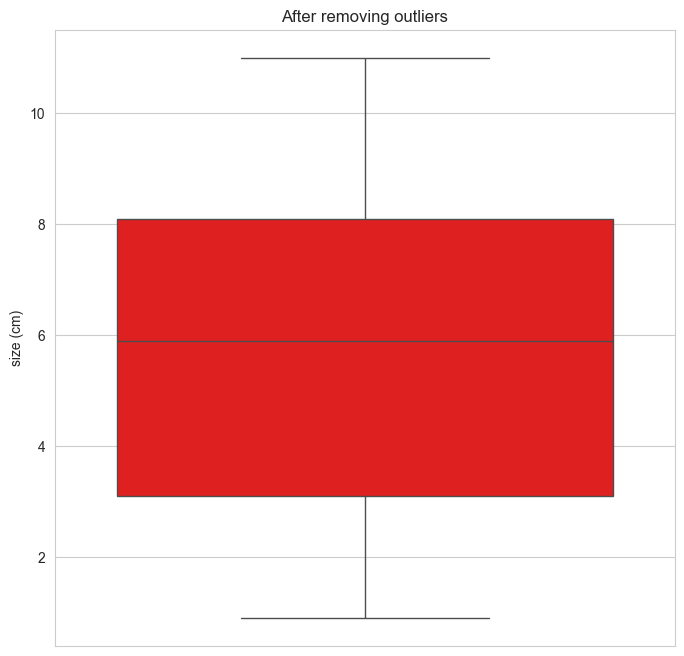

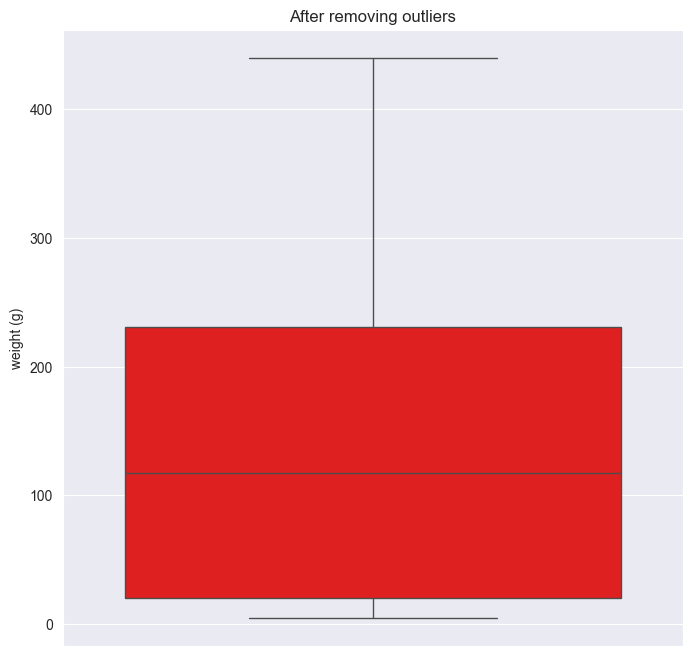

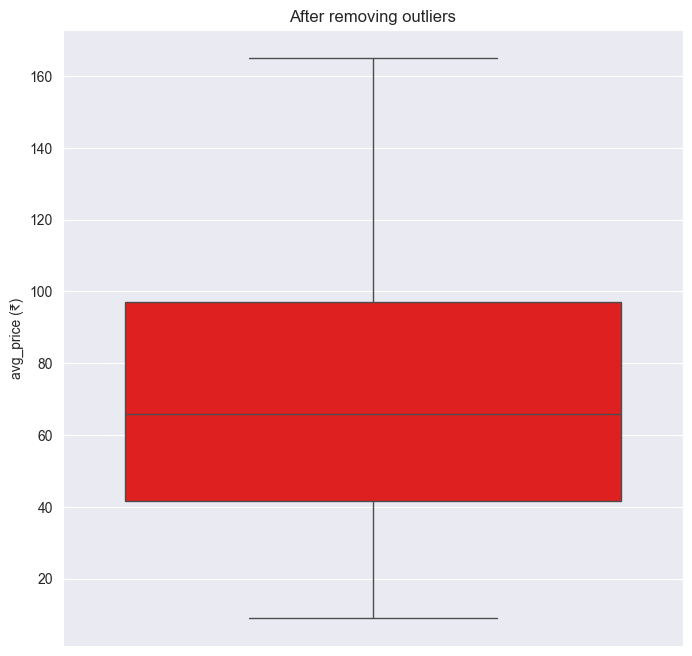

In [27]:
for i in num_columns:
  plt.figure(figsize=(8,8))
  plt.title("After removing outliers")
  sns.set_style(style="darkgrid")
  sns.boxplot(y=df[i], color="red")

<Axes: >

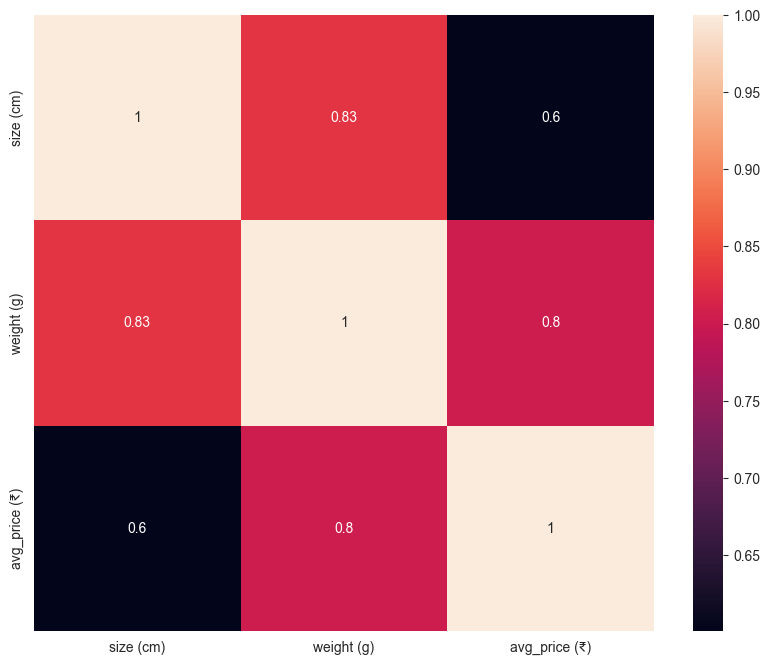

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_columns].corr(), annot=True)

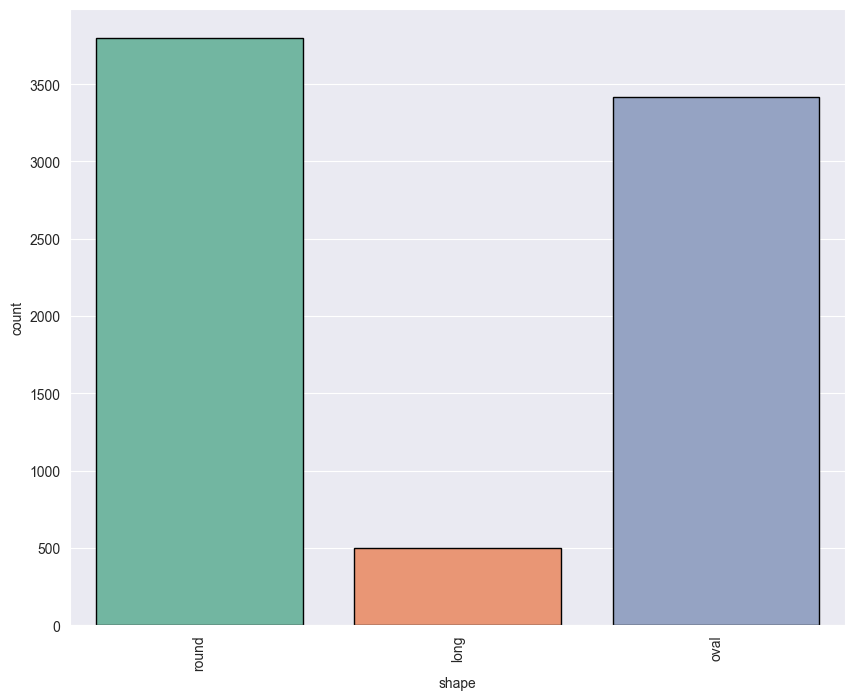

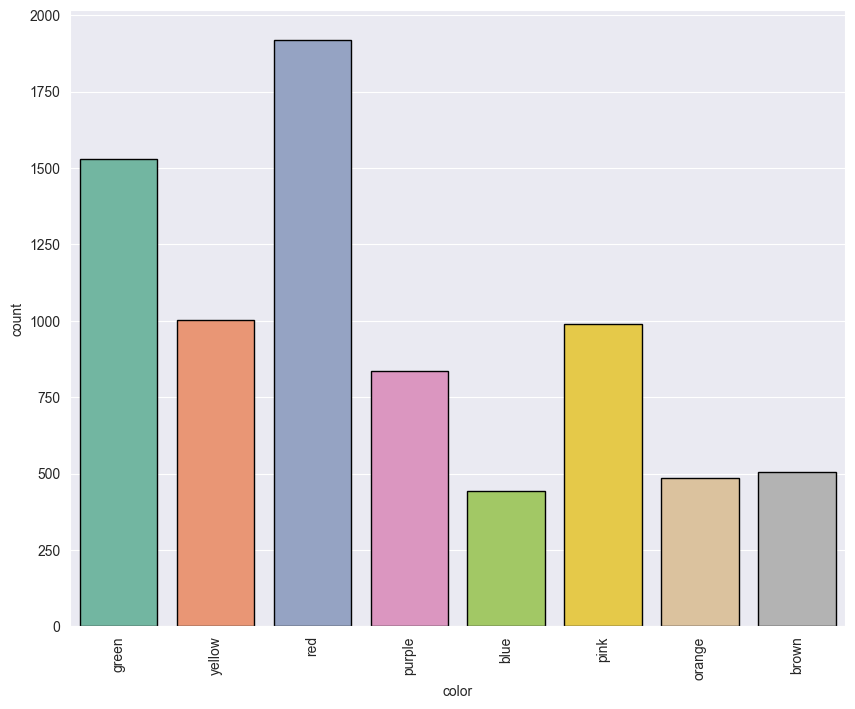

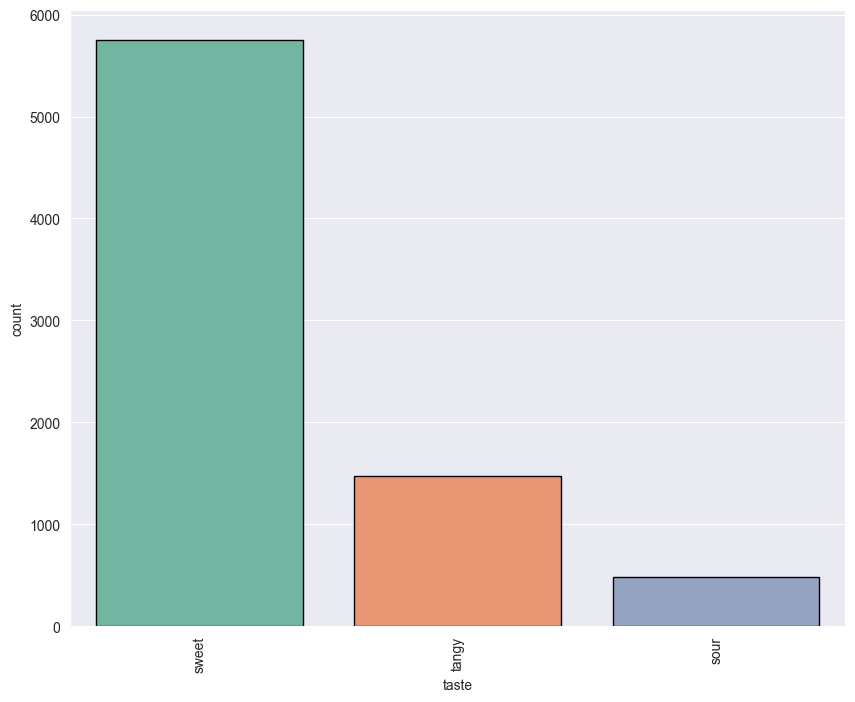

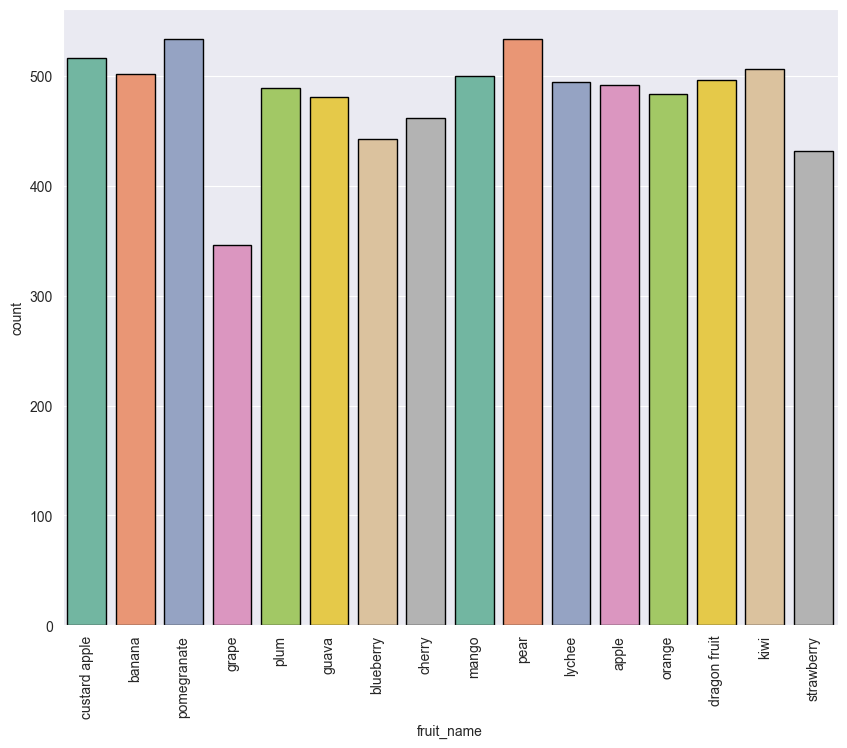

In [29]:
for i in cat_columns:
  plt.figure(figsize=(10,8))
  sns.set_style("darkgrid")
  sns.countplot(x=df[i], palette="Set2", edgecolor="black")
  plt.xticks(rotation=90)


In [30]:
counts = df[cat_columns].value_counts()
print(f"INFO : Frequency counts \n{counts}")

INFO : Frequency counts 
shape  color   taste  fruit_name   
oval   green   sweet  pear             534
round  red     sweet  pomegranate      534
       green   sweet  custard apple    516
oval   brown   tangy  kiwi             506
long   yellow  sweet  banana           502
oval   yellow  sweet  mango            500
       pink    sweet  dragon fruit     496
round  pink    sweet  lychee           495
       red     sweet  apple            492
       purple  tangy  plum             489
oval   orange  tangy  orange           484
round  green   sour   guava            481
oval   red     sweet  cherry           462
round  blue    sweet  blueberry        443
oval   red     sweet  strawberry       432
round  purple  sweet  grape            346
Name: count, dtype: int64


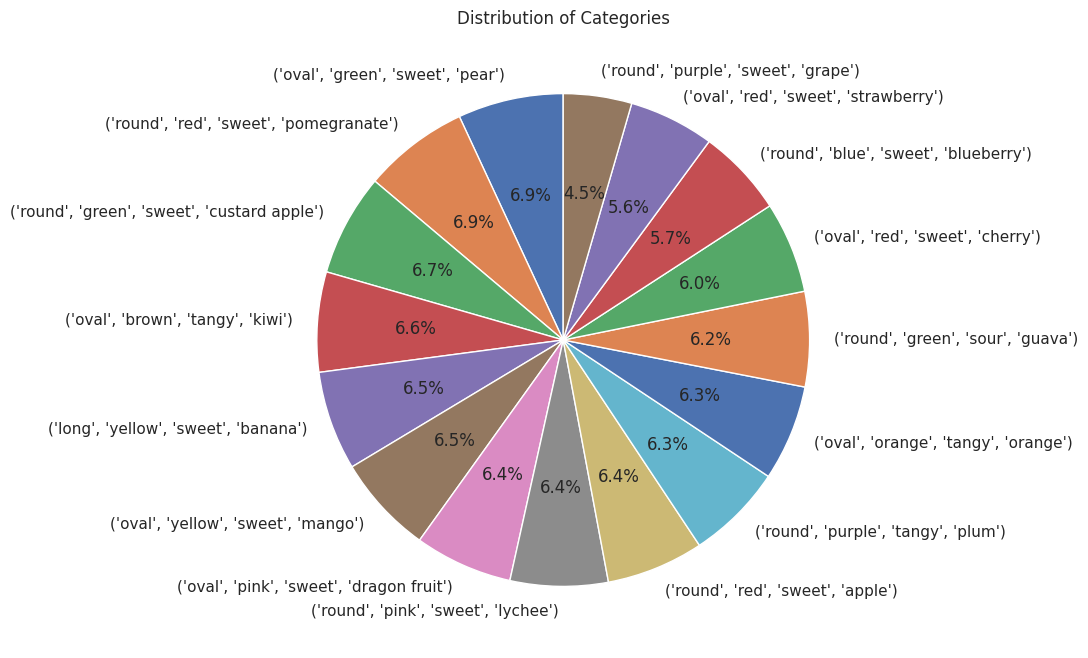

In [31]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'white'})
plt.title('Distribution of Categories')
plt.show()

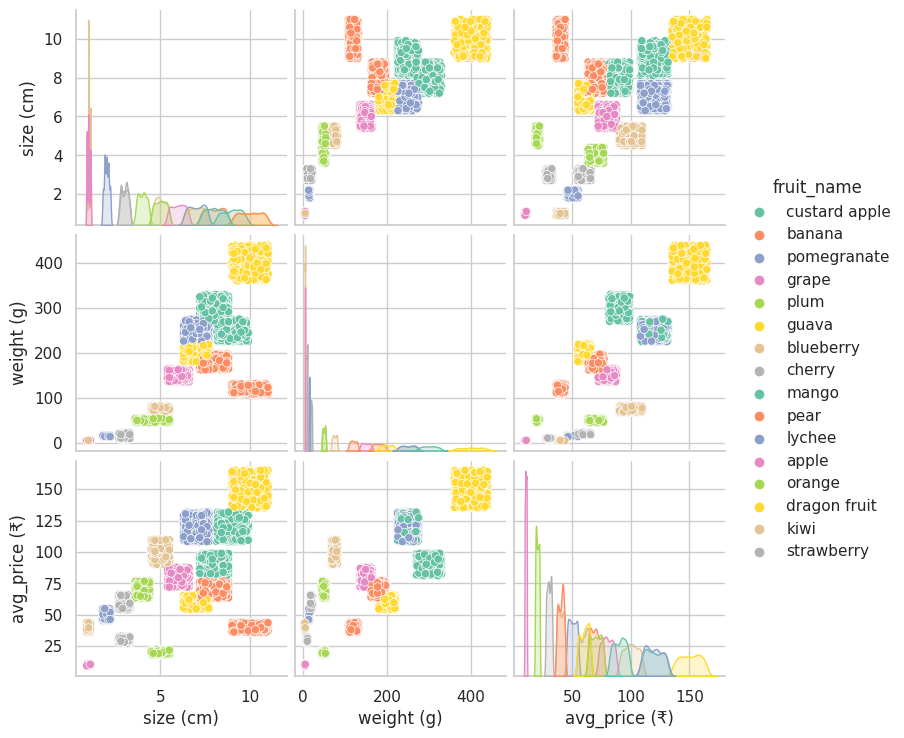

In [32]:
sns.pairplot(df, hue='fruit_name', palette='Set2')
sns.set_style("whitegrid")

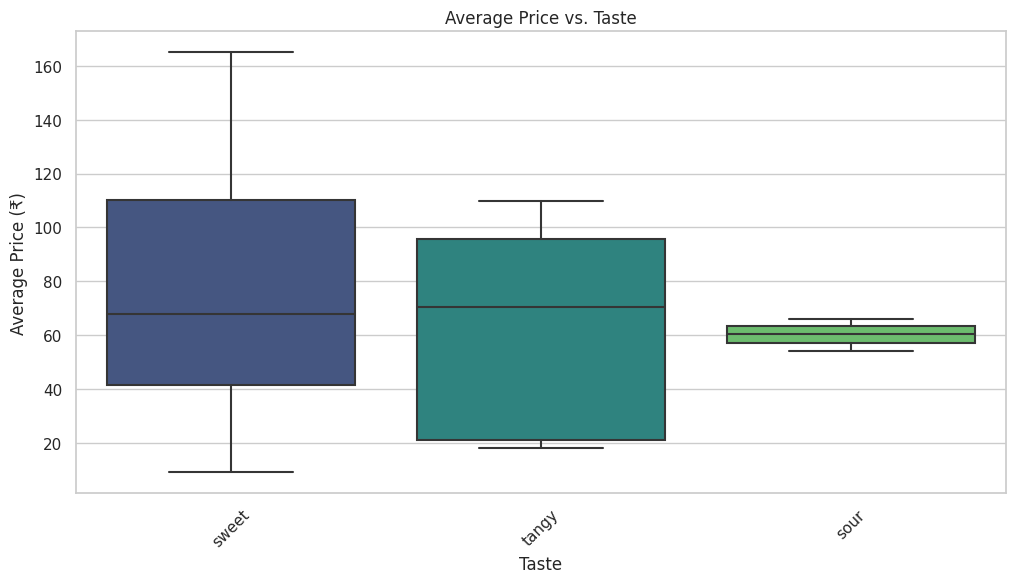

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='taste', y='avg_price (₹)', data=df, palette='viridis')
plt.title('Average Price vs. Taste')
plt.xlabel('Taste')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.show()

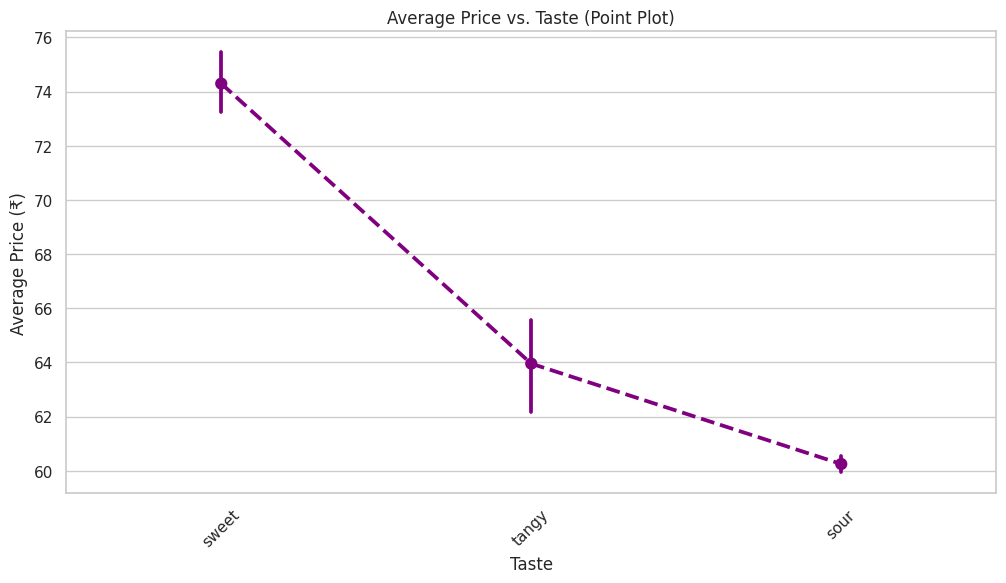

In [34]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='taste', y='avg_price (₹)', data=df, color='purple', markers='o', linestyles='--')
plt.title('Average Price vs. Taste (Point Plot)')
plt.xlabel('Taste')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.show()

## **5. Model Building**
### **We used a Pipeline with preprocessing and classification in one go.**

### **Steps:**

* **Numerical features → Standard Scaled**

* **Categorical features → Ordinal Encoded**

* **Model Used → RandomForestClassifier**


In [35]:
X = df.drop('fruit_name', axis=1)
y = df['fruit_name']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_categorical_columns = [col for col in cat_columns if col != 'fruit_name']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ("cat", OrdinalEncoder(), X_categorical_columns) # Changed LabelEncoder to OrdinalEncoder
    ]
)

In [38]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('classifier',RandomForestClassifier())
])

In [39]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['size (cm)', 'weight (g)',
                                                   'avg_price (₹)']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['shape', 'color',
                                                   'taste'])])),
                ('classifier', RandomForestClassifier())])

In [40]:
y_predict  = pipeline.predict(x_test)

## **6. Model Evaluation**

In [41]:
accuracy_score = accuracy_score(y_predict,y_test)

In [42]:
confusion_matrix = confusion_matrix(y_predict,y_test)

In [43]:
classification_report = classification_report(y_predict,y_test)

In [44]:
print(f"Accuracy Score : {accuracy_score}")

Accuracy Score : 1.0


In [45]:
print(f"Confusion Matrix : \n{confusion_matrix}")

Confusion Matrix : 
[[105   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  86   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  86   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  81   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  71   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 100   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  96   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  98   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 105   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 100   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 117   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 113   0   0]
 [  0   0   0   0   0   0   0   0   0   0 

In [46]:
print(f"Classification Report : \n{classification_report}")

Classification Report : 
               precision    recall  f1-score   support

        apple       1.00      1.00      1.00       105
       banana       1.00      1.00      1.00        93
    blueberry       1.00      1.00      1.00        86
       cherry       1.00      1.00      1.00        86
custard apple       1.00      1.00      1.00       100
 dragon fruit       1.00      1.00      1.00        81
        grape       1.00      1.00      1.00        71
        guava       1.00      1.00      1.00       100
         kiwi       1.00      1.00      1.00        96
       lychee       1.00      1.00      1.00        98
        mango       1.00      1.00      1.00       105
       orange       1.00      1.00      1.00       100
         pear       1.00      1.00      1.00       117
         plum       1.00      1.00      1.00       113
  pomegranate       1.00      1.00      1.00       106
   strawberry       1.00      1.00      1.00        86

     accuracy                         

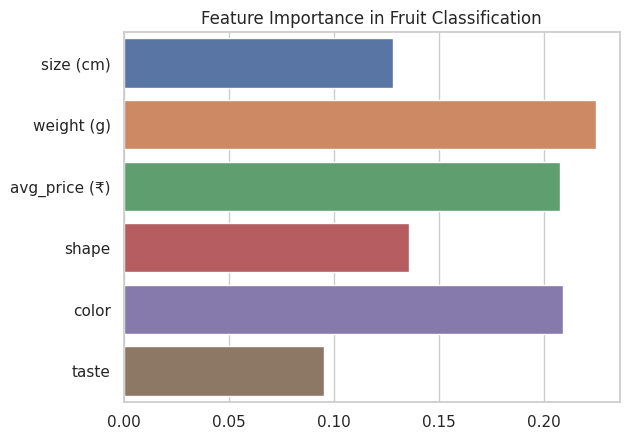

In [47]:
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = numerical_columns + X_categorical_columns
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Fruit Classification")
plt.show()


### **“What happens if a fruit’s price doubles? Does the prediction change?”**

In [48]:
sample = x_test.sample(1)
print("Original:", pipeline.predict(sample))
sample['avg_price (₹)'] *= 2
print("After Price Doubles:", pipeline.predict(sample))


Original: ['lychee']
After Price Doubles: ['lychee']


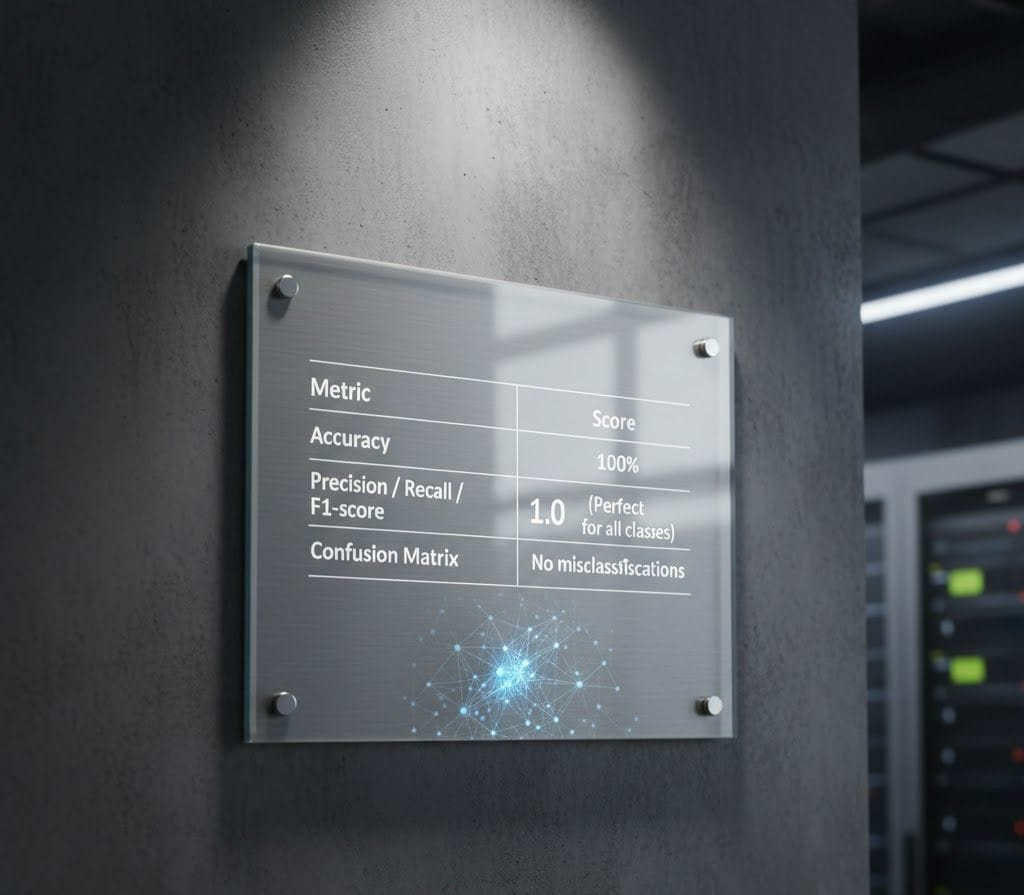

## **7. Results**

* **The model achieved flawless classification on the test data.**

* **Every fruit type was predicted without a single error.**

* **Dataset separation and feature quality were exceptionally strong.**

## **8. Learnings & Takeaways**

* **The IQR method efficiently handled outliers and improved model stability.**

* **A well-structured pipeline simplifies preprocessing and modeling.**

* **The dataset is highly separable — ideal for demonstrating supervised classification techniques.**

## **9. References**

* **Scikit-learn: Random Forest Classifier Documentation**

* **Kaggle Dataset – Fruit Classification**

* **IQR Method Explanation (Towards Data Science)**